In [2]:
from google.colab import files
uploaded = files.upload()

Saving trainset4.csv to trainset4.csv


array([ 1. ,  0. ,  0. , -2.5,  0. , -3.3,  0. ], dtype=float32)
100 636.49506
200 597.2157
300 546.9922
400 483.48395
500 419.88263
600 361.7279
700 310.18835
800 279.31598
900 262.97266
1000 253.69699
MAE: 0.001831
정확도: 0.020833


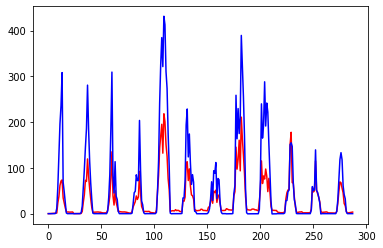

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib
import os
import matplotlib.pyplot as plt

tf.random.set_seed(300)

data_set = np.loadtxt("trainset4.csv",delimiter=',',dtype=np.float32)
tf.print(data_set[0])

x_data = data_set[:,0:6]
y_data = data_set[:,6:7]


X = tf.cast(x_data,tf.float32)
Y = tf.cast(y_data,tf.float32)

W1 = tf.Variable(tf.random.uniform(shape=[6, 6], minval=-1., maxval=1.,dtype=tf.float32),trainable=True)
W2 = tf.Variable(tf.random.uniform(shape=[6, 6], minval=-1., maxval=1.,dtype=tf.float32),trainable=True)
W3 = tf.Variable(tf.random.uniform(shape=[6, 6], minval=-1., maxval=1.,dtype=tf.float32),trainable=True)
W4 = tf.Variable(tf.random.uniform(shape=[6, 6], minval=-1., maxval=1.,dtype=tf.float32),trainable=True)
W5 = tf.Variable(tf.random.uniform(shape=[6, 1], minval=-1., maxval=1.,dtype=tf.float32),trainable=True)


b1 = tf.Variable(tf.zeros([6]),dtype=tf.float32,trainable=True)
b2 = tf.Variable(tf.zeros([6]),dtype=tf.float32,trainable=True)
b3 = tf.Variable(tf.zeros([6]),dtype=tf.float32,trainable=True)
b4 = tf.Variable(tf.zeros([6]),dtype=tf.float32,trainable=True)
b5 = tf.Variable(tf.zeros([1]),dtype=tf.float32,trainable=True)



trainable_variables=[W1,W2,b1,b2]
L1 = tf.math.add(tf.matmul(X, W1), b1)
L1 = tf.nn.relu(L1)
L2 = tf.math.add(tf.matmul(L1, W2), b2)
L2 = tf.nn.relu(L2)
L3 = tf.math.add(tf.matmul(L2, W3), b3)
L3 = tf.nn.relu(L3)
L4 = tf.math.add(tf.matmul(L3, W4), b4)
L4 = tf.nn.relu(L4)
model = tf.add(tf.matmul(L4, W5), b5)

def cost():
  L1 = tf.math.add(tf.matmul(X, W1), b1)
  L1 = tf.nn.relu(L1)
  L2 = tf.math.add(tf.matmul(L1, W2), b2)
  L2 = tf.nn.relu(L2)
  L3 = tf.math.add(tf.matmul(L2, W3), b3)
  L3 = tf.nn.relu(L3)
  L4 = tf.math.add(tf.matmul(L3, W4), b4)
  L4 = tf.nn.relu(L4)
  model = tf.add(tf.matmul(L4, W5), b5)
  w = tf.subtract(Y,model)
  ww= tf.square(w)
  wow = tf.reduce_mean(ww)
  return wow;

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)




for step in range(1000):
    train_op = optimizer.minimize(cost,trainable_variables)

    if (step + 1) % 100 == 0:
        print(step + 1, cost().numpy())



prediction = model
target = Y
#print('예측값:', prediction.numpy())
#print('실제값:', target.numpy())


is_correct = tf.equal(prediction, target)
bb = tf.reduce_sum(Y)
aa = tf.subtract(Y,model)
aaa = tf.reduce_mean(tf.abs(aa))
print('MAE: %f' % tf.divide(aaa,bb))


accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도: %f' % accuracy.numpy())

plt.plot(model, 'r')
plt.plot(Y,'b')
plt.show()